In [184]:
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from time import sleep, process_time
import random
import string
import numpy as np
from sklearn.mixture import GaussianMixture

In [275]:
def simple_string_compare(a, b):
    
    i = 0
    
    while i < len(a) and i < len(b):
        
        if a[i] != b[i]:
            return
        
        sleep(0.005)
        
        i += 1

In [71]:
allowed_characters = string.ascii_uppercase + string.ascii_lowercase + string.digits

In [72]:
def random_string(length):    
    return ''.join(random.choices(allowed_characters, k=length))

In [73]:
unknown_password = random_string(24)

In [151]:
first_timings = []

for _ in range(500):
    
    guess_password = unknown_password[:12] + random_string(12)
    while guess_password[12] == unknown_password[12]:
        guess_password = unknown_password[:12] + random_string(12)
    
    start = timer()
    simple_string_compare(unknown_password, guess_password)
    end = timer()
    
    first_timings += [(end - start) * 1000000]

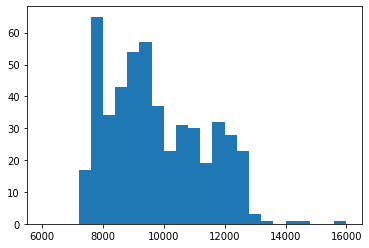

In [163]:
_ = plt.hist(first_timings, range=(6000, 16000), bins=25)

In [153]:
second_timings = []

for _ in range(500):
    
    guess_password = unknown_password[:13] + random_string(11)
    while guess_password[13] == unknown_password[13]:
        guess_password = unknown_password[:13] + random_string(11)
    
    start = timer()
    simple_string_compare(unknown_password, guess_password)
    end = timer()
    
    second_timings += [(end - start) * 1000000]

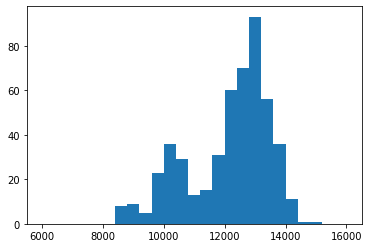

In [162]:
_ = plt.hist(second_timings, range=(6000, 16000), bins=25)

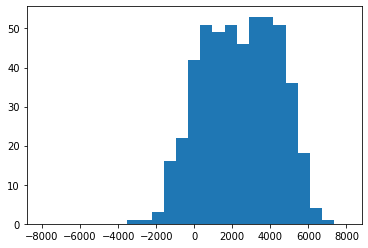

In [161]:
_ = plt.hist([(second - first) for first, second in zip(first_timings, second_timings)], range=(-8000, 8000), bins=25)

In [156]:
np.mean([(second - first) for first, second in zip(first_timings, second_timings)])

2398.712997091934

In [302]:
deltas = []
chars = []

for _ in range(200):
    
    guess_password_km1 = unknown_password[:12] + random_string(12)
    #while guess_password_km1[12] == unknown_password[12]:
    #    guess_password_km1 = unknown_password[:12] + random_string(12)
            
    start = timer()
    simple_string_compare(unknown_password, guess_password_km1)
    end = timer()

    t_km1 = (end - start) * 1000000

    guess_password_k = unknown_password[:12] + random_string(1) + guess_password_km1[13:]

    start = timer()
    simple_string_compare(unknown_password, guess_password_k)
    end = timer()

    t_k = (end - start) * 1000000

    deltas += [t_k - t_km1]
    chars += [guess_password_k[12]]

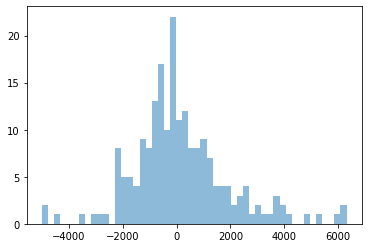

In [303]:
_ = plt.hist(deltas, bins=50, alpha=0.5)

In [304]:
gmm = GaussianMixture(n_components=2, means_init=np.array([[0],[0]]), weights_init=(0.50, 0.50))

In [305]:
gmm.fit(np.array(deltas).reshape(-1, 1))

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=array([[0.],
       [0.]]), n_components=2, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=array([0.5, 0.5]))

In [306]:
gmm.means_

array([[ 667.00935873],
       [-306.00975043]])

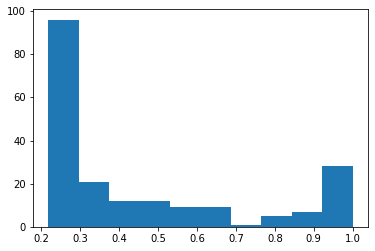

In [307]:
_ = plt.hist(gmm.predict_proba(np.array(deltas).reshape(-1, 1))[:,0])

In [308]:
probs = gmm.predict_proba(np.array(deltas[100:]).reshape(-1, 1))[:,0]

In [312]:
probs[np.argsort(probs)[::-1]]

array([1.        , 0.99999996, 0.99999955, 0.99999027, 0.99995329,
       0.99992619, 0.99987889, 0.99987841, 0.99986929, 0.99954101,
       0.99894845, 0.99718964, 0.99531663, 0.98890025, 0.98784273,
       0.98542095, 0.97769653, 0.9741234 , 0.96637782, 0.96312262,
       0.92081241, 0.92029696, 0.87984066, 0.85636929, 0.82938613,
       0.80410818, 0.7811472 , 0.67989685, 0.66816272, 0.61046752,
       0.58170628, 0.54846661, 0.54824282, 0.5005491 , 0.49339058,
       0.48298589, 0.46906559, 0.44379361, 0.44138584, 0.42925927,
       0.41894597, 0.41841039, 0.38908956, 0.38700413, 0.38166377,
       0.36665929, 0.36650913, 0.36596935, 0.36349333, 0.34689052,
       0.34304413, 0.31932286, 0.31284075, 0.30471144, 0.29733444,
       0.29731409, 0.29085401, 0.28912437, 0.27584337, 0.27156148,
       0.26556351, 0.26397484, 0.26168663, 0.25290468, 0.25034172,
       0.24871108, 0.24857249, 0.24508149, 0.24275547, 0.23666329,
       0.2364352 , 0.23500632, 0.23319079, 0.23263801, 0.23199

In [313]:
np.array(chars)[np.argsort(probs)[::-1]]

array(['s', '7', 't', 'F', 'j', 'z', '1', 'b', 'e', 'C', 'r', '3', 'H',
       'y', 'R', '1', 'w', 'd', 'f', '7', 'D', 'H', 'c', '1', 'b', 'J',
       'V', 'y', 'B', 'J', 'F', 'L', 'G', 'H', 'X', 'c', 'B', 'X', 'Z',
       '8', 'v', '5', 'q', 'S', 'p', '8', 'u', 'K', '6', 'z', 'D', 'b',
       'P', '2', 'F', 'v', 'g', 'e', 'V', 'k', 'e', 'z', 'C', '6', 'W',
       'W', 'h', '1', 'l', 'b', 'A', 'l', 'm', 'N', 'Y', 'Z', 'o', 'G',
       'K', 's', 'N', '9', '3', '7', '7', 'G', 'U', 'J', 'X', 'L', '0',
       'F', 'i', 'O', 'N', '6', 'Y', 'k', '5', 'd'], dtype='<U1')

In [314]:
unknown_password[12]

'X'